In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 200)

In [3]:
applicationData = pd.read_csv('application_data.csv')

In [4]:
previousApplication = pd.read_csv('previous_application.csv')

In [5]:
print(applicationData.size)

37516342


In [6]:
print(applicationData.shape)

(307511, 122)


### Analysing Data Types

In [7]:
applicationData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

In [8]:
objectTypeColumns = list(applicationData.select_dtypes(['object']).columns)
print(len(objectTypeColumns))

16


#### 16 columns have dypes as object. Lets observe the kind of data

In [9]:
for column in objectTypeColumns:
    print(column)
    print(applicationData[column].value_counts())
    print('*'*100)

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
****************************************************************************************************
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
****************************************************************************************************
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
****************************************************************************************************
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
****************************************************************************************************
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
********************

Following columns contain string/ text data
- NAME_CONTRACT_TYPE
- NAME_TYPE_SUITE
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS
- NAME_HOUSING_TYPE
- OCCUPATION_TYPE
- ORGANIZATION_TYPE
- FONDKAPREMONT_MODE
- HOUSETYPE_MODE
- WALLSMATERIAL_MODE

Following can be considered for converting to int and map to 0 and 1 for analysis

- CODE_GENDER 
- FLAG_OWN_CAR
- FLAG_OWN_REALTY
- WEEKDAY_APPR_PROCESS_START
- EMERGENCYSTATE_MODE

As observed, following columns have incorrect data types:</font>
- CNT_FAM_MEMBERS (Float) should be int64
- DEF_30_CNT_SOCIAL_CIRCLE (Float) should be int64
- DAYS_LAST_PHONE_CHANGE (Float) should be int64
- AMT_REQ_CREDIT_BUREAU_HOUR (Float) should be int64
- AMT_REQ_CREDIT_BUREAU_WEEK (Float) should be int64

### Fixing to correct data type of columns

In [10]:
#Fixing the data type for CNT_FAM_MEMBERS, DEF_30_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE,
#AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_WEEK
applicationData.CNT_FAM_MEMBERS = applicationData.CNT_FAM_MEMBERS.astype('Int64')
applicationData.DEF_30_CNT_SOCIAL_CIRCLE = applicationData.DEF_30_CNT_SOCIAL_CIRCLE.astype('Int64')
applicationData.DAYS_LAST_PHONE_CHANGE = applicationData.DAYS_LAST_PHONE_CHANGE.astype('Int64')
applicationData.AMT_REQ_CREDIT_BUREAU_HOUR = applicationData.AMT_REQ_CREDIT_BUREAU_HOUR.astype('Int64')
applicationData.AMT_REQ_CREDIT_BUREAU_WEEK = applicationData.AMT_REQ_CREDIT_BUREAU_WEEK.astype('Int64')

## Handling Null values

In [11]:
def getColumnWiseNulls():
    colWiseNulls = round(100*(applicationData.isnull().sum()/len(applicationData.index)), 2)
    colWiseNulls.sort_values(ascending=False, inplace=True)
    return colWiseNulls

In [12]:
def plotColumnWiseNulls(lowerRange=0, upperRange=100):
    res = getColumnWiseNulls()
    plt.figure(figsize=(20,4))
    res[(res>=lowerRange)&(res<=upperRange)].plot.bar()
    

In [13]:
applicationData = applicationData[applicationData['NAME_FAMILY_STATUS']!='Unknown']

## Drop columns with more that 50 % null values

In [14]:
def RemoveNullColumns(dataFrame, percent= 0.5):
    df = dataFrame.copy()
    ishape = df.shape
    colWiseNulls = df.isnull().sum()/len(df.index)
    colNames = list(colWiseNulls[colWiseNulls.values>=percent].index)
    df.drop(labels=colNames, inplace=True , axis=1)
    
    return df

In [15]:
getColumnWiseNulls()

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.36
LIVINGAPARTMENTS_MODE           68.36
LIVINGAPARTMENTS_AVG            68.36
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

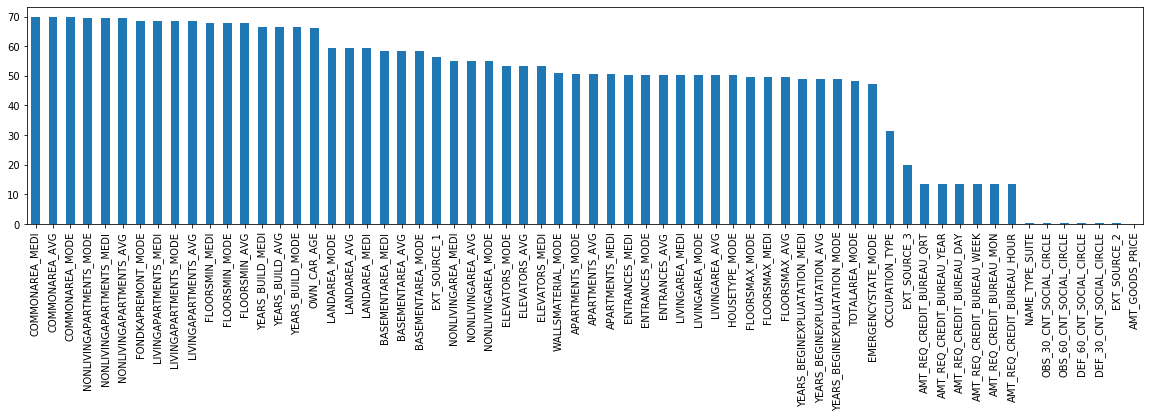

In [16]:
plotColumnWiseNulls(0.01)

In [17]:
applicationData = RemoveNullColumns(applicationData)

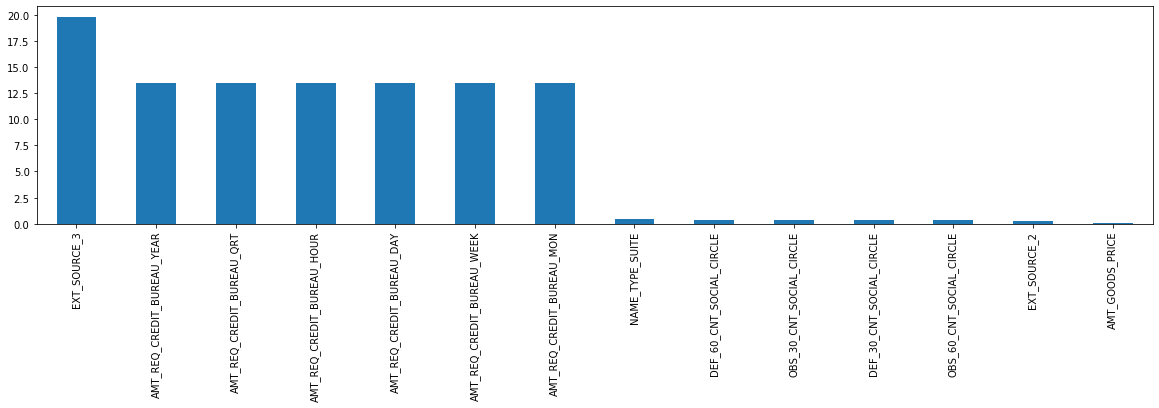

In [18]:
plotColumnWiseNulls(0.01, 30) ##only plot columns with null values between 10% and 30%

In [19]:
## lets examine gender column for nulls
## As it was mentioned during session XNA is not null
applicationData['CODE_GENDER'].value_counts(normalize=True)

F      0.658345
M      0.341642
XNA    0.000013
Name: CODE_GENDER, dtype: float64

#### only four values are not male or female in gender column. We can impute it with mode

In [20]:
mode=applicationData['CODE_GENDER'].mode().values[0]

In [21]:
applicationData['CODE_GENDER'].replace('XNA', mode, inplace=True)

In [22]:
applicationData['CODE_GENDER'].value_counts()

F    202451
M    105058
Name: CODE_GENDER, dtype: int64

In [23]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

count    265991.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


0    264365
1      1560
2        56
3         9
4         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

#### Since both median and mode are 0, it is safe to fill nulls with 0. Mean cannot work out here since the number of enquiries cannot be fractional


In [24]:
applicationData.loc[applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR']=0

In [25]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].describe())
applicationData['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts()

count    307509.000000
mean          0.005538
std           0.078014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


0    305883
1      1560
2        56
3         9
4         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

### For imputing columns AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK , AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR following logic is being used.
- we have computed a metric (median/mode) for each column. Specific selection of metric is mentioned near the code for selection
- after that we select max of the queries made during a smaller time period or the metric selected in above step. 
 For example - for AMT_REQ_CREDIT_BUREAU_WEEK, we have computed the median value, but if there are any queries made during last day and if that number is more than median, we choose that number as those queries are part of the week. 

In [26]:
# generic function to impute based on above logic
import math
def fillNaForCreditInquries(row,currentColumn, previousColumn, altValue):
    if math.isnan(row[currentColumn]):
        res = max(row[previousColumn], altValue)
    else:
        res=  row[currentColumn]
    return res

#### AMT_REQ_CREDIT_BUREAU_DAY


In [27]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].describe())

count    265991.000000
mean          0.007000
std           0.110758
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


In [28]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())

41518


In [29]:
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    264502
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

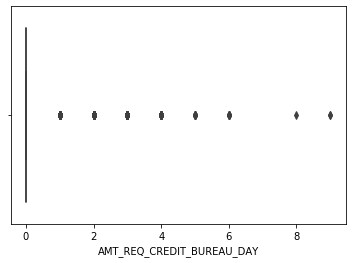

In [30]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_DAY', data=applicationData)

In [31]:
# For imputation we use daily data. If hourly review is available and greater than 0 we use that else we impute with median/mode(both are 0)
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 0))

In [32]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum())


0


In [33]:
applicationData['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts()

0.0    306020
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_WEEK


In [34]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].describe())

count    265991.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


In [35]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())

41518


In [36]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)*100

0    96.790869
1     3.085819
2     0.074815
3     0.021805
4     0.012782
6     0.007519
5     0.003760
8     0.001880
7     0.000752
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

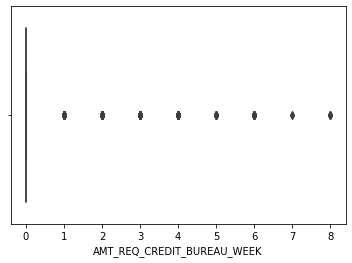

In [37]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_WEEK', data=applicationData)

In [38]:
# For imputation we use weekly data. If daily review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY', 0))

In [39]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum())


0


In [40]:
applicationData['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts()


0.0    298973
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_MON


In [41]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].describe())

count    265991.000000
mean          0.267396
std           0.916004
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


In [42]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())

41518


In [43]:
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()

0.0     222232
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

#### values greater than  11 can be considered outliers as the number of values are considerably low

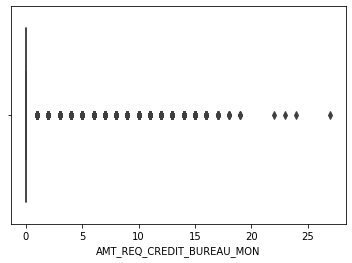

In [44]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_MON', data=applicationData)

In [45]:
# For imputation we use monthly data. If weekly is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_MON'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK', 0))

In [46]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].describe())
print(applicationData['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum())
applicationData['AMT_REQ_CREDIT_BUREAU_MON'].value_counts()


count    307509.000000
mean          0.231294
std           0.856813
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64
0


0.0     263750
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_QRT


In [47]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].describe())


count    265991.000000
mean          0.265475
std           0.794057
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


In [48]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())

41518


In [49]:
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()

0.0      215416
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

####  Values of 19, 261 is a clear outlier. Also there is only 1 record each with such values hence we can consider deleting or capping it later

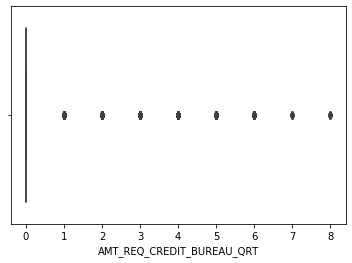

In [50]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_QRT', data=applicationData[applicationData['AMT_REQ_CREDIT_BUREAU_QRT']<19])

In [51]:
# For imputation we use quarterly data. If monthly review is available and greater than 0 we use that else we impute with median/mode
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_MON', 0))

In [52]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].describe())
print(applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum())
applicationData['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts()


count    307509.000000
mean          0.229632
std           0.744061
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64
0


0.0      256934
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

#### AMT_REQ_CREDIT_BUREAU_YEAR


In [53]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())

count    265991.000000
mean          1.899978
std           1.869298
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


In [54]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())


41518


In [55]:
applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()


0.0     71801
1.0     63404
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

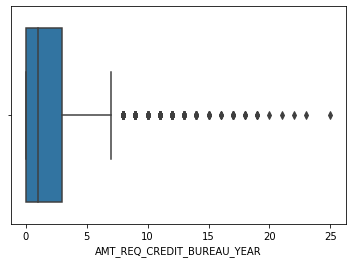

In [56]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_YEAR', data=applicationData)

####  Values >15 have significantly lower number of values. and may be treated as outliers

In [57]:
temp = applicationData.loc[applicationData['AMT_REQ_CREDIT_BUREAU_YEAR']<10, 'AMT_REQ_CREDIT_BUREAU_YEAR']
temp.describe()

count    265850.000000
mean          1.894125
std           1.851204
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

#### If we remove the outliers i.e applications with >= 10 inquiries , mean and median, mode still tend to 1. So we can substitute the value by 1

In [58]:
applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'] = applicationData.apply(fillNaForCreditInquries, axis=1, args=('AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_QRT', 1))

In [59]:
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())
print(applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum())
applicationData['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts()


count    307509.000000
mean          1.778468
std           1.765528
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
0


1.0     104922
0.0      71801
2.0      50192
3.0      33628
4.0      20714
5.0      12052
6.0       6967
7.0       3869
8.0       2127
9.0       1096
11.0        31
12.0        30
10.0        22
13.0        19
14.0        10
17.0         7
15.0         6
19.0         4
18.0         4
16.0         3
21.0         1
23.0         1
25.0         1
20.0         1
22.0         1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

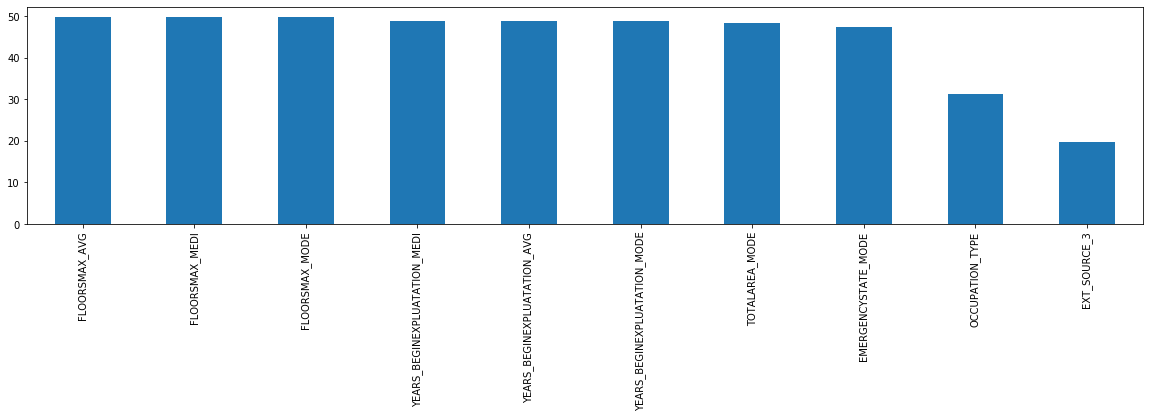

In [60]:
# inspect null values
plotColumnWiseNulls(1)

## Subset Dataframe 
#### Subsetting the Application_Data dataframe to get relevant 30 columns as per ourunderstanding for further analysis.

    Selected the following columns:
    1. SK_ID_CURR
    2. TARGET
    3. NAME_CONTRACT_TYPE
    4. CODE_GENDER
    5. FLAG_OWN_REALTY
    6. CNT_CHILDREN
    7. AMT_INCOME_TOTAL
    8. AMT_CREDIT
    9. AMT_ANNUITY
    10. NAME_INCOME_TYPE
    11. NAME_EDUCATION_TYPE
    12. NAME_FAMILY_STATUS
    13. REGION_POPULATION_RELATIVE
    14. DAYS_BIRTH
    15. DAYS_EMPLOYED
    16. FLAG_MOBIL
    17. FLAG_CONT_MOBILE
    18. OCCUPATION_TYPE
    19. CNT_FAM_MEMBERS
    20. REGION_RATING_CLIENT_W_CITY
    21. WEEKDAY_APPR_PROCESS_START
    22. REG_REGION_NOT_LIVE_REGION
    23. ORGANIZATION_TYPE
    24. EXT_SOURCE_2
    25. DEF_30_CNT_SOCIAL_CIRCLE
    26. DAYS_LAST_PHONE_CHANGE
    27. FLAG_DOCUMENT_2
    28. FLAG_DOCUMENT_3
    29. AMT_REQ_CREDIT_BUREAU_HOUR
    30. AMT_REQ_CREDIT_BUREAU_WEEK

In [61]:
NumericalColumns= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'Age', 'DAYS_EMPLOYED']

In [62]:
#Subsetting the Application_Data dataframe toget the required columns
Required_Columns = ['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE',
                   'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
                   'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_CONT_MOBILE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
                   'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
                   'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
                   'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK']

applicationDataRevised = applicationData[Required_Columns]

In [63]:
applicationDataRevised.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,WEEKDAY_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Working,...,WEDNESDAY,0,Business Entity Type 3,0.262949,2,-1134,0,1,0,0.0
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,State servant,...,MONDAY,0,School,0.622246,0,-828,0,1,0,0.0
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Working,...,MONDAY,0,Government,0.555912,0,-815,0,0,0,0.0
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,Working,...,WEDNESDAY,0,Business Entity Type 3,0.650442,0,-617,0,1,0,0.0
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,Working,...,THURSDAY,0,Religion,0.322738,0,-1106,0,0,0,0.0


# Creating Bins 

### Lets observe AMT_INCOME_TOTAL column

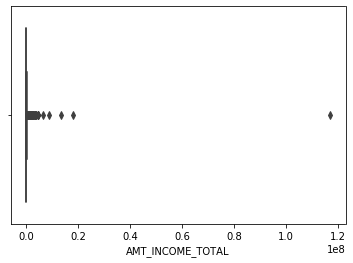

In [64]:
sns.boxplot(applicationDataRevised['AMT_INCOME_TOTAL'])


In [65]:
applicationDataRevised['AMT_INCOME_TOTAL'].describe()

count    3.075090e+05
mean     1.687969e+05
std      2.371234e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [66]:
applicationDataRevised['AMT_INCOME_TOTAL'].quantile([0,.1,.2,.25,.5,.75,.9,.95,.99,1])

0.00        25650.0
0.10        81000.0
0.20        99000.0
0.25       112500.0
0.50       147150.0
0.75       202500.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

### Observation
There is an incremental increase in income ranges. There are some indiviuals with high incomes but those are around 0.1% . Around 20% have income less than 1,00,000. 50% have income less than 1,50,000 75% population has income less than 2,00,000. Similarly there can be division on basis of 50000 income difference. 

In [67]:
cut_bins = [0,50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 1000000, 1050000]
cut_labels = [ '<=50k', '50k-1 lac', '1 lac-1.5 lac', '1.5 lac-2 lac','2lac-2.5lac', '2.5lac-3lac', '3lac-3.5lac', '3.5lac-4lac', '4lac-4.5lac', '4.5lac-5lac', '5lac-10lac', '>10lac']
applicationDataRevised['income_bins'] = pd.cut(applicationDataRevised['AMT_INCOME_TOTAL'].clip(upper=1000001), bins=cut_bins,include_lowest =True, labels=cut_labels)
res = applicationDataRevised[['income_bins', 'AMT_INCOME_TOTAL']]

In [68]:
applicationDataRevised['income_bins'].value_counts()

1 lac-1.5 lac    91591
1.5 lac-2 lac    64307
50k-1 lac        59181
2lac-2.5lac      48136
2.5lac-3lac      17039
3lac-3.5lac       8874
3.5lac-4lac       5802
4lac-4.5lac       4923
<=50k             4517
5lac-10lac        2452
4.5lac-5lac        437
>10lac             250
Name: income_bins, dtype: int64

In [69]:
res[res['AMT_INCOME_TOTAL']>1000000].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,income_bins,AMT_INCOME_TOTAL
12840,>10lac,117000000.0
203693,>10lac,18000090.0
246858,>10lac,13500000.0
77768,>10lac,9000000.0
131127,>10lac,6750000.0
...,...,...
7061,>10lac,1035000.0
215170,>10lac,1035000.0
58760,>10lac,1012500.0
264932,>10lac,1009368.0


In [70]:
res[res['AMT_INCOME_TOTAL']<50000].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,income_bins,AMT_INCOME_TOTAL
222891,<=50k,49950.0
141762,<=50k,49950.0
113823,<=50k,49783.5
145280,<=50k,49716.0
109583,<=50k,49549.5
...,...,...
246104,<=50k,26100.0
186643,<=50k,26100.0
240137,<=50k,26100.0
20727,<=50k,25650.0


In [71]:
res[(res['AMT_INCOME_TOTAL']>=200000) &(res['AMT_INCOME_TOTAL']<=250000) ].sort_values(by='AMT_INCOME_TOTAL', ascending=False)

,income_bins,AMT_INCOME_TOTAL
281449,2lac-2.5lac,249750.0
15016,2lac-2.5lac,249750.0
299527,2lac-2.5lac,249750.0
133616,2lac-2.5lac,249750.0
144459,2lac-2.5lac,249750.0
...,...,...
233635,2lac-2.5lac,200250.0
17154,2lac-2.5lac,200250.0
223884,2lac-2.5lac,200250.0
86954,2lac-2.5lac,200250.0


### Lets observe DAYS_BIRTH column

In [72]:
applicationDataRevised['DAYS_BIRTH'].value_counts()

-13749    43
-13481    42
-10020    41
-18248    41
-10292    40
          ..
-25032     1
-7956      1
-8001      1
-7861      1
-24894     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

In [73]:
applicationDataRevised[applicationDataRevised['DAYS_BIRTH']>0]['DAYS_BIRTH'].value_counts()

Series([], Name: DAYS_BIRTH, dtype: int64)

#### we have observed that most days are mentioned in -ve. We are converting them to +ve and then convert to years to find age. We will then bin them

In [74]:
applicationDataRevised['DAYS_BIRTH'] = -applicationDataRevised['DAYS_BIRTH'] 

#  use absolute function

In [75]:
# observe that all values are now positiveabs
applicationDataRevised[applicationDataRevised['DAYS_BIRTH']<0]['DAYS_BIRTH'].value_counts()

Series([], Name: DAYS_BIRTH, dtype: int64)

In [76]:
applicationDataRevised['AGE'] = round(applicationDataRevised['DAYS_BIRTH']/365, 2)
applicationDataRevised['AGE'].head()

0    25.92
1    45.93
2    52.18
3    52.07
4    54.61
Name: AGE, dtype: float64

In [77]:
applicationDataRevised['AGE'].describe()

count    307509.000000
mean         43.937037
std          11.956150
min          20.520000
25%          34.010000
50%          43.150000
75%          53.920000
max          69.120000
Name: AGE, dtype: float64

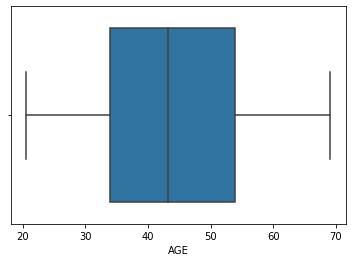

In [78]:
sns.boxplot(applicationDataRevised['AGE'])

In [79]:
applicationDataRevised['AGE'].quantile([0,.1,.2,.25,.5,.75,.9,.95,.99,1])

0.00    20.52
0.10    28.18
0.20    32.04
0.25    34.01
0.50    43.15
0.75    53.92
0.90    60.77
0.95    63.57
0.99    66.90
1.00    69.12
Name: AGE, dtype: float64

#### looking at above plot and quantile range values, it is clear that age is very continuously distributed variable.  
It also seems logical to create bins of size 10

In [80]:
cut_bins = list(range(0,80,10))
cut_bins

[0, 10, 20, 30, 40, 50, 60, 70]

In [81]:

cut_labels = ['<=10', '10-20', '20-30', '30-40', '40-50','50-60', '>60']
applicationDataRevised['AgeGroup'] = pd.cut(applicationDataRevised['AGE'].clip(upper=71), bins=cut_bins,include_lowest =True, labels=cut_labels)
res = applicationDataRevised[['AgeGroup', 'AGE']]

In [82]:
res['AgeGroup'].value_counts()

30-40    82314
40-50    76526
50-60    68066
20-30    45041
>60      35562
10-20        0
<=10         0
Name: AgeGroup, dtype: int64

### Split data on based on target

In [83]:
#Filtering out rows with Target = 1 in Revised_Application_Data 
Revised_App_Data_Target_1 = applicationDataRevised[(applicationDataRevised.TARGET == 1)]

#Filtering out rows with Target = 0 in Revised_Application_Data 
Revised_App_Data_Target_0 = applicationDataRevised[(applicationDataRevised.TARGET == 0)]

## Finding correlation for each data set

In [84]:
NumericalColumns= ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'AGE', 'DAYS_EMPLOYED']

In [85]:
correlationSubsetTarget1 = Revised_App_Data_Target_1[NumericalColumns]
correlationSubsetTarget0 = Revised_App_Data_Target_0[NumericalColumns]

In [86]:
# Target =1 correlation
corr1= round(correlationSubsetTarget1.corr(),3)
corr1

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000,0.038,0.046,0.009,-0.003,-0.015
AMT_CREDIT,0.038,1.000,0.752,0.069,0.135,-0.001
AMT_ANNUITY,0.046,0.752,1.000,0.072,0.014,-0.083
REGION_POPULATION_RELATIVE,0.009,0.069,0.072,1.000,0.048,0.015
AGE,-0.003,0.135,0.014,0.048,1.000,0.575
DAYS_EMPLOYED,-0.015,-0.001,-0.083,0.015,0.575,1.000


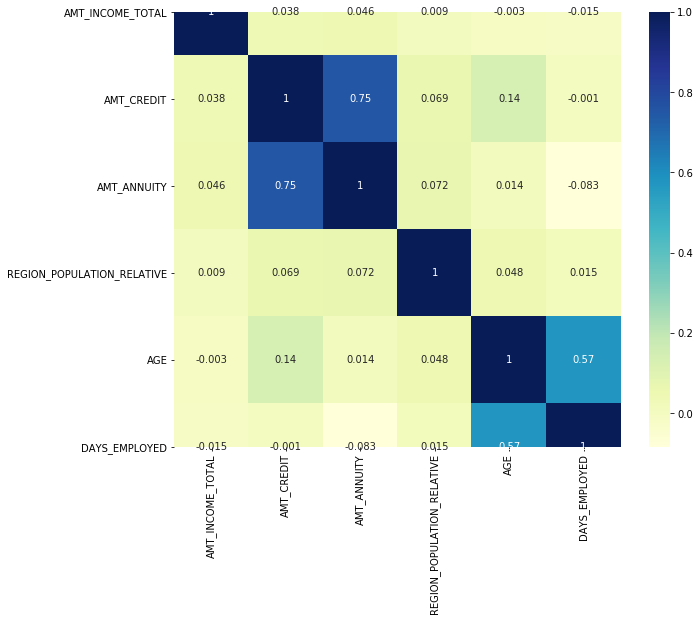

In [87]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr1, cmap="YlGnBu", annot=True)
plt.show()

In [88]:
# Target =0 correlation
corr0= round(correlationSubsetTarget0.corr(),3)
corr0

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,AGE,DAYS_EMPLOYED
AMT_INCOME_TOTAL,1.000,0.343,0.419,0.168,-0.063,-0.141
AMT_CREDIT,0.343,1.000,0.771,0.101,0.047,-0.073
AMT_ANNUITY,0.419,0.771,1.000,0.121,-0.012,-0.106
REGION_POPULATION_RELATIVE,0.168,0.101,0.121,1.000,0.025,-0.007
AGE,-0.063,0.047,-0.012,0.025,1.000,0.618
DAYS_EMPLOYED,-0.141,-0.073,-0.106,-0.007,0.618,1.000


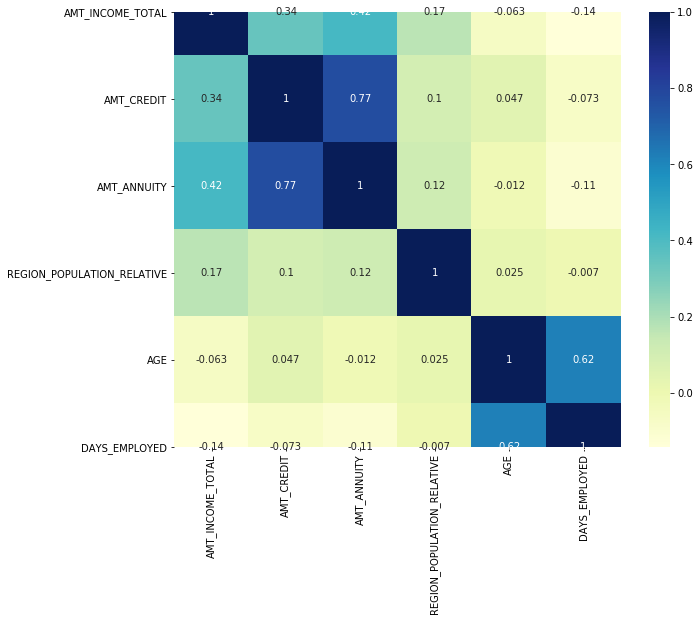

In [89]:
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(corr0, cmap="YlGnBu", annot=True)
plt.show()

In [90]:
corrdf = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns=['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf.sort_values('Correlation', ascending=False)

,VAR1,VAR2,Correlation
13,AMT_ANNUITY,AMT_CREDIT,0.771
34,DAYS_EMPLOYED,AGE,0.618
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.419
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.343
18,REGION_POPULATION_RELATIVE,AMT_INCOME_TOTAL,0.168
20,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.121
19,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.101
25,AGE,AMT_CREDIT,0.047
27,AGE,REGION_POPULATION_RELATIVE,0.025
33,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,-0.007


In [91]:
corrdf = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool)).unstack().reset_index()
corrdf.columns=['VAR1', 'VAR2', 'Correlation']
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf.sort_values('Correlation', ascending=False)

,VAR1,VAR2,Correlation
13,AMT_ANNUITY,AMT_CREDIT,0.752
34,DAYS_EMPLOYED,AGE,0.575
25,AGE,AMT_CREDIT,0.135
20,REGION_POPULATION_RELATIVE,AMT_ANNUITY,0.072
19,REGION_POPULATION_RELATIVE,AMT_CREDIT,0.069
27,AGE,REGION_POPULATION_RELATIVE,0.048
12,AMT_ANNUITY,AMT_INCOME_TOTAL,0.046
6,AMT_CREDIT,AMT_INCOME_TOTAL,0.038
33,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,0.015
26,AGE,AMT_ANNUITY,0.014


## Observation 
- AMT_CREDIT AND AMT_ANNUITY have the highest correlation in both the data sets
- These are even more correlated for target 0 i.e for the cases where there is not default

## Univariate analysis for numerical columns

### Age Column

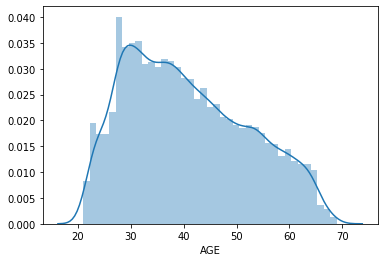

In [92]:
sns.distplot(Revised_App_Data_Target_1['AGE'])

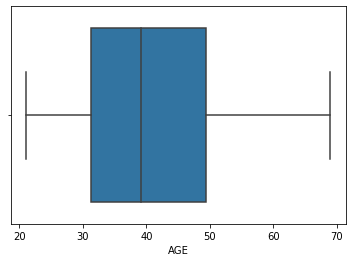

In [93]:
sns.boxplot(Revised_App_Data_Target_1['AGE'])

#### Observation
- Highest number of people who have applied for loan and defaulted are in age of 25-40 years.
- right skewed distribution indicates that higher age indiviuals tend to have less payment difficulties

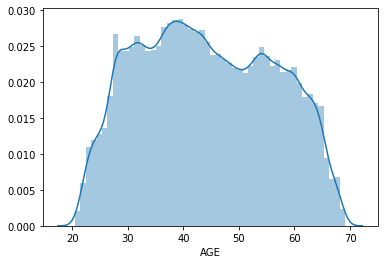

In [94]:
sns.distplot(Revised_App_Data_Target_0['AGE'])

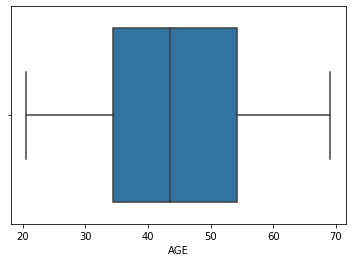

In [95]:
sns.boxplot(Revised_App_Data_Target_0['AGE'])

#### Observation
- For people with no payment difficulties data is relatively symmetrical. 
- From given data we say that people of all ages are likely to pay back money. Therefore we should look at other parameters

### AMT_INCOME_TOTAL(Income of the client)


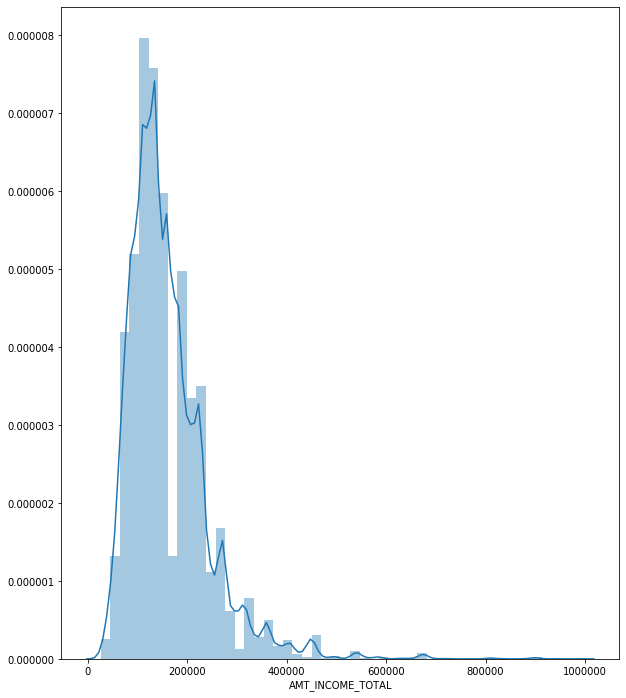

In [96]:
plt.figure(figsize=(10,12))
sns.distplot(Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

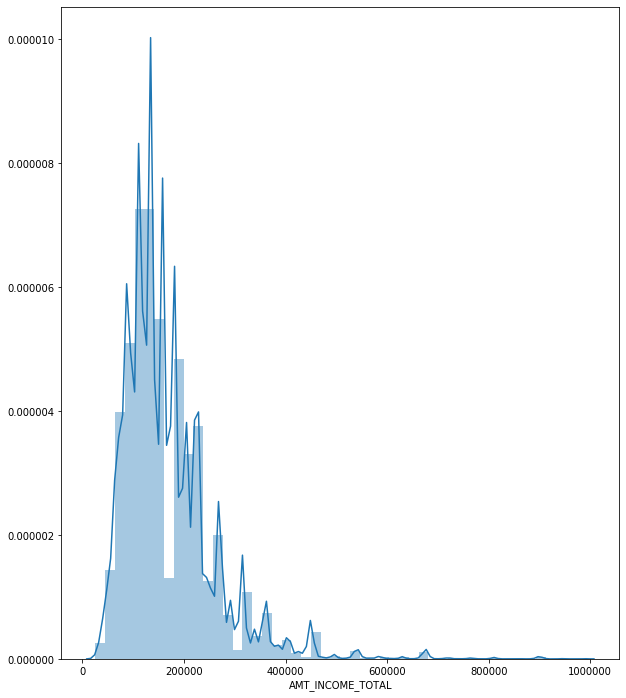

In [97]:
plt.figure(figsize=(10,12))
sns.distplot(Revised_App_Data_Target_0[Revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

In [98]:
Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'].describe()

count     24812.000000
mean     160237.665827
std       80988.062237
min       25650.000000
25%      112500.000000
50%      135000.000000
75%      202500.000000
max      990000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [99]:
Revised_App_Data_Target_1['AMT_INCOME_TOTAL'].describe()

count    2.482500e+04
mean     1.656118e+05
std      7.466770e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.350000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

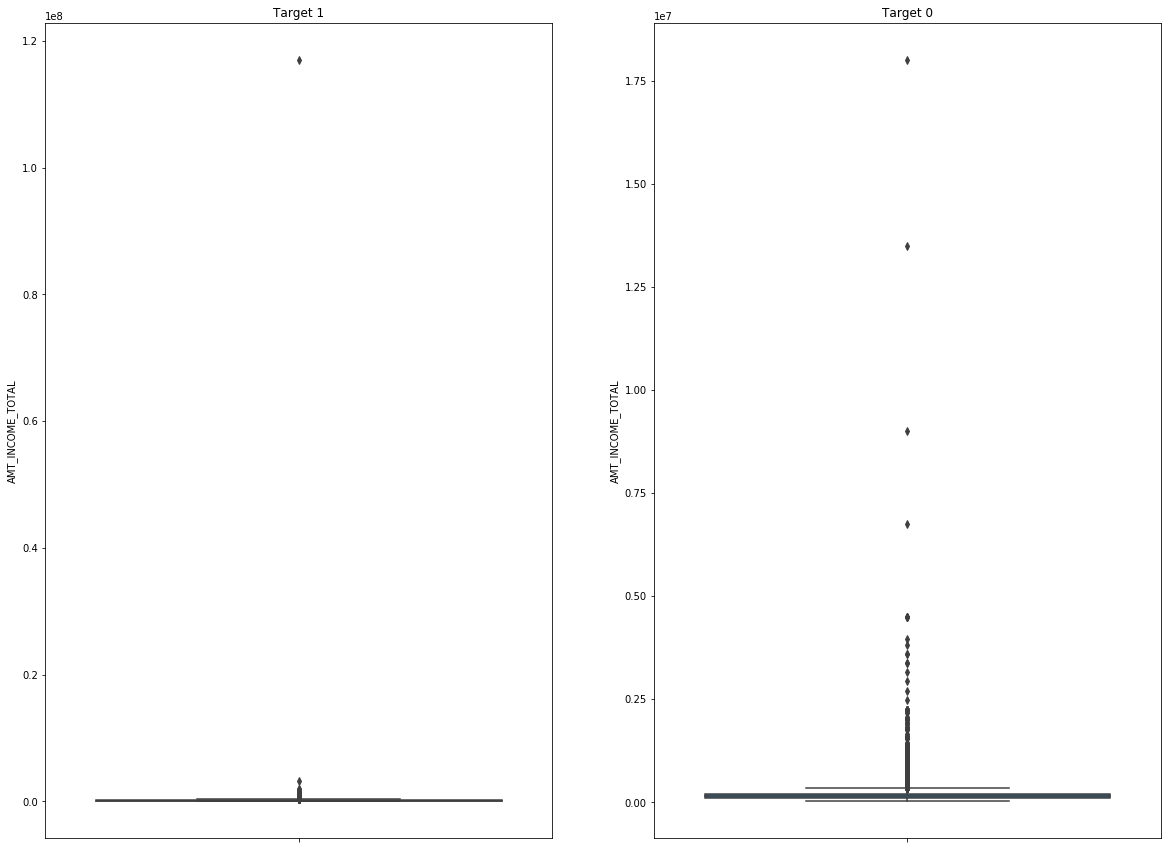

In [100]:
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.title('Target 1')
# plt.yscale('log')
sns.boxplot(y=Revised_App_Data_Target_1['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
# plt.yscale('log')
sns.boxplot(y=Revised_App_Data_Target_0['AMT_INCOME_TOTAL'])

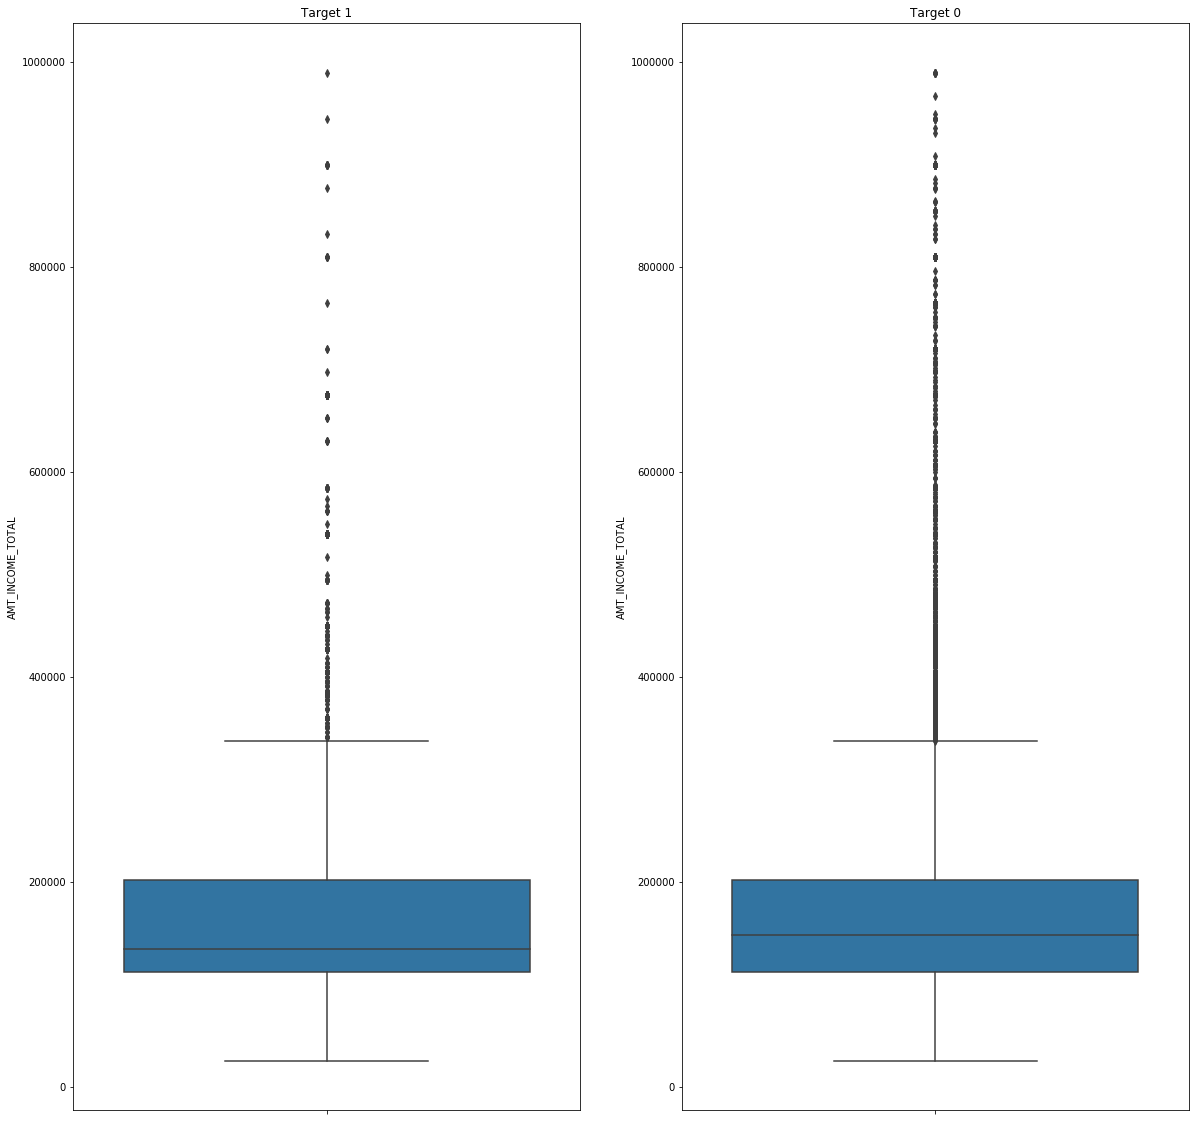

In [101]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=Revised_App_Data_Target_0[Revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000]['AMT_INCOME_TOTAL'])

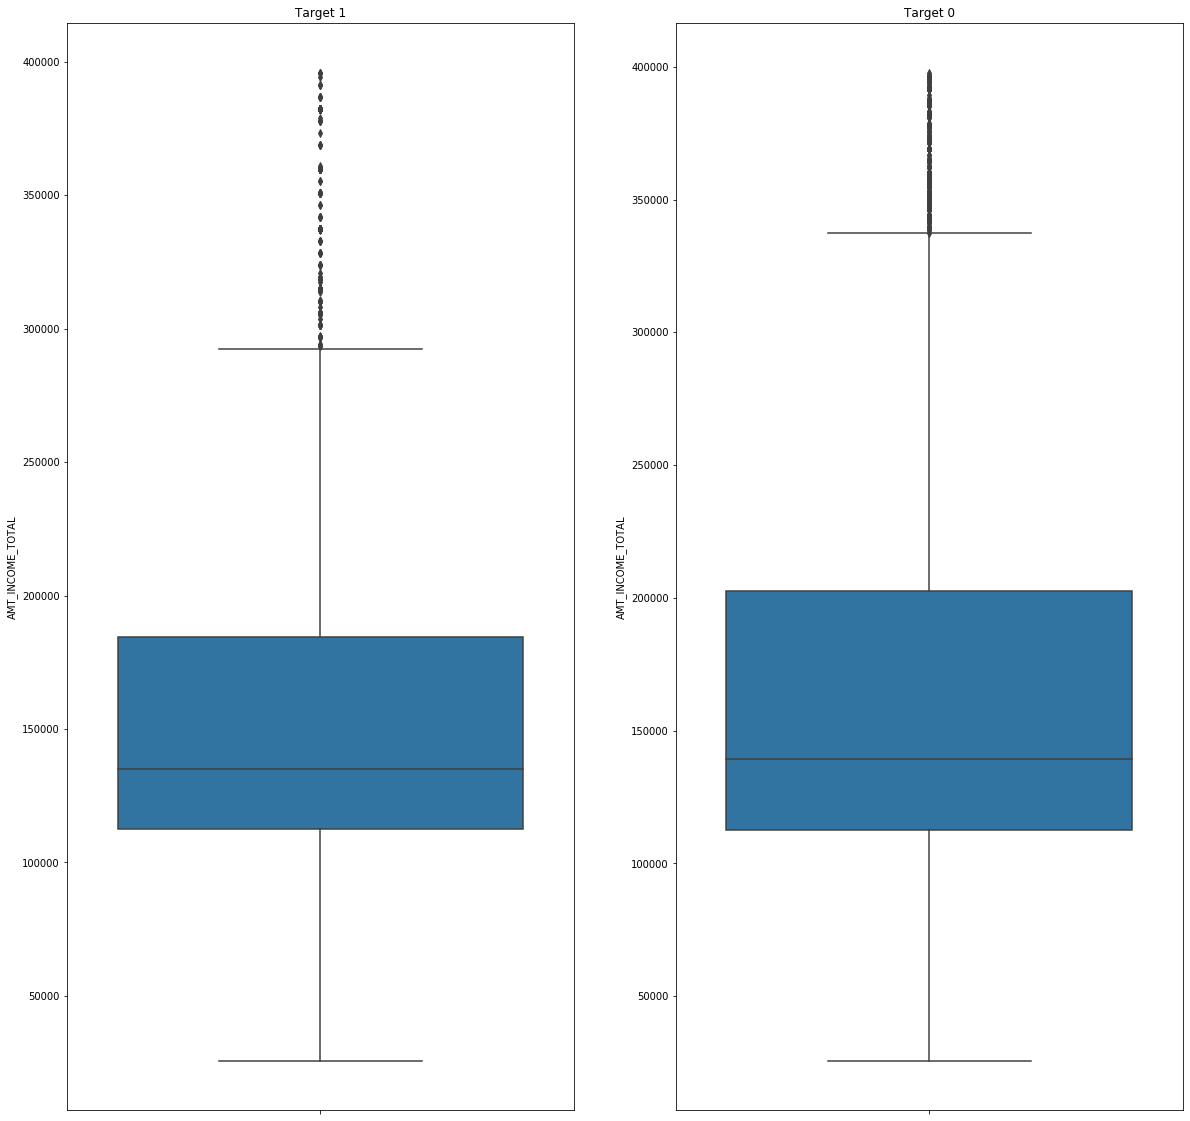

In [102]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<400000]['AMT_INCOME_TOTAL'])
plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=Revised_App_Data_Target_0[Revised_App_Data_Target_0['AMT_INCOME_TOTAL']<400000]['AMT_INCOME_TOTAL'])

#### Observation for above plots
- For people with income more than 10 lac there is very less risk of default
- People with income less than 3 lacs are most likely to face difficulties in payments
- More specifically, majority of people who faced difficulties had income between 1 lac and 2 lacs approximately

In [103]:
applicationDataRevised.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,...,EXT_SOURCE_2,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,income_bins,AGE,AgeGroup
0,100002,1,Cash loans,M,Y,0,202500.0,406597.5,24700.5,Working,...,0.262949,2,-1134,0,1,0,0.0,2lac-2.5lac,25.92,20-30
1,100003,0,Cash loans,F,N,0,270000.0,1293502.5,35698.5,State servant,...,0.622246,0,-828,0,1,0,0.0,2.5lac-3lac,45.93,40-50
2,100004,0,Revolving loans,M,Y,0,67500.0,135000.0,6750.0,Working,...,0.555912,0,-815,0,0,0,0.0,50k-1 lac,52.18,50-60
3,100006,0,Cash loans,F,Y,0,135000.0,312682.5,29686.5,Working,...,0.650442,0,-617,0,1,0,0.0,1 lac-1.5 lac,52.07,50-60
4,100007,0,Cash loans,M,Y,0,121500.0,513000.0,21865.5,Working,...,0.322738,0,-1106,0,0,0,0.0,1 lac-1.5 lac,54.61,50-60


### AMT_ANNUITY

In [104]:
Revised_App_Data_Target_1['AMT_ANNUITY'].describe()

count     24825.000000
mean      26481.744290
std       12450.676999
min        2722.500000
25%       17361.000000
50%       25263.000000
75%       32976.000000
max      149211.000000
Name: AMT_ANNUITY, dtype: float64

In [105]:
Revised_App_Data_Target_0['AMT_ANNUITY'].describe()

count    282672.000000
mean      27163.592667
std       14658.353274
min        1615.500000
25%       16456.500000
50%       24876.000000
75%       34749.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [106]:
Revised_App_Data_Target_0['AMT_ANNUITY'].isnull().sum()

12

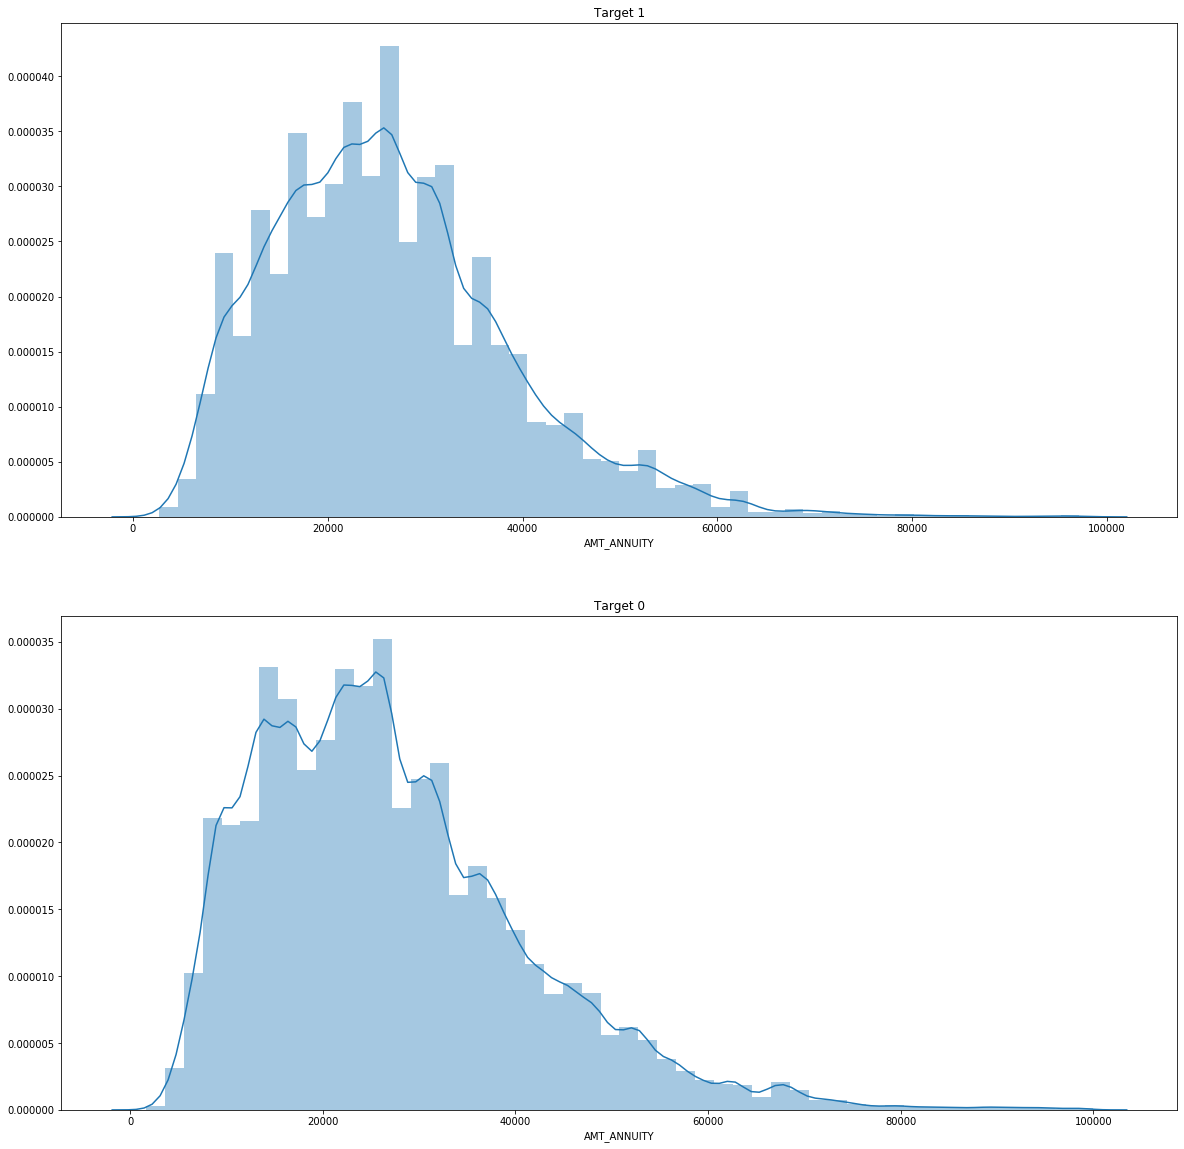

In [107]:
plt.figure(figsize=(20,20))
plt.subplot(211)
plt.title('Target 1')
sns.distplot(Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_ANNUITY']<100000]['AMT_ANNUITY'])

plt.subplot(212)
plt.title('Target 0')
sns.distplot(Revised_App_Data_Target_0[Revised_App_Data_Target_0['AMT_ANNUITY']<100000]['AMT_ANNUITY'].dropna())

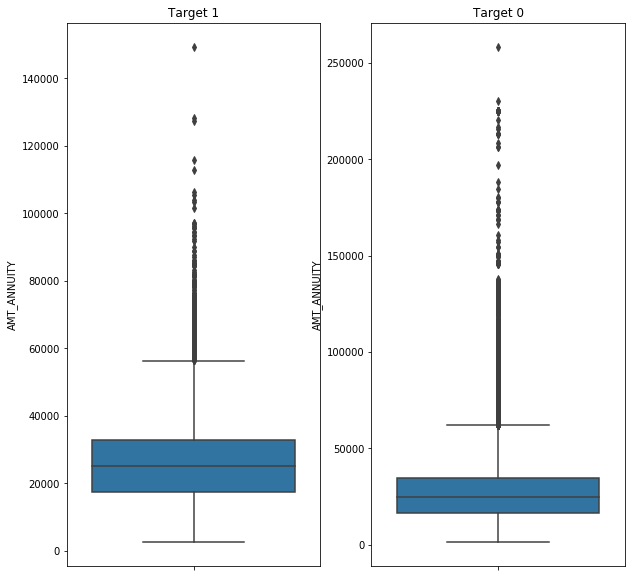

In [108]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.title('Target 1')
sns.boxplot(y=Revised_App_Data_Target_1['AMT_ANNUITY'].dropna())

plt.subplot(122)
plt.title('Target 0')
sns.boxplot(y=Revised_App_Data_Target_0['AMT_ANNUITY'].dropna())

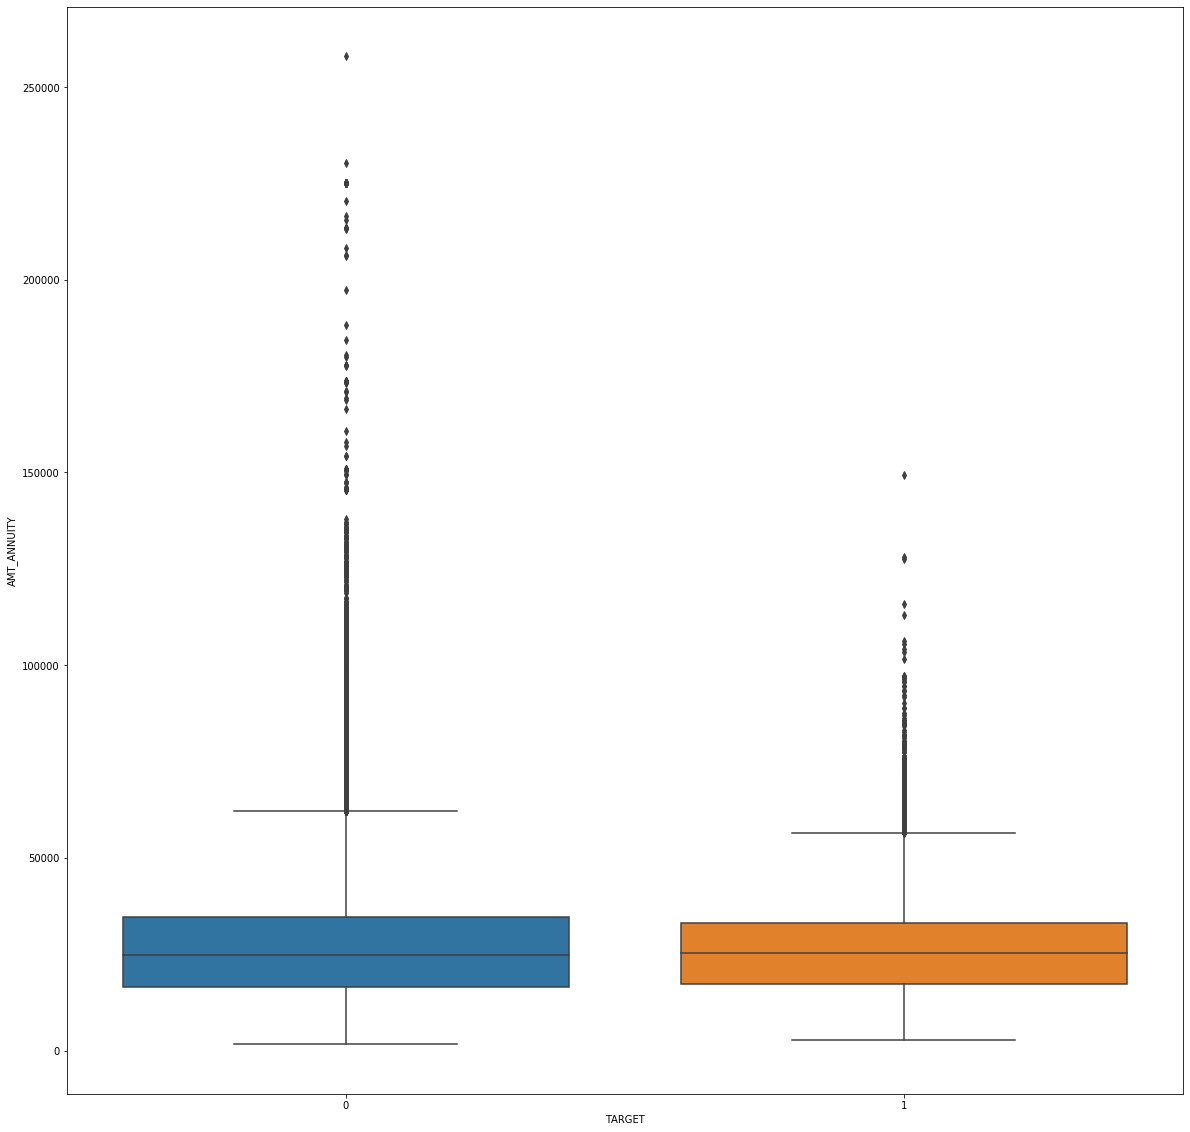

In [109]:
plt.figure(figsize=(20,20))
sns.boxplot(data=applicationDataRevised, x='TARGET', y='AMT_ANNUITY')

# Bivariate analysis

## NAME_FAMILY_STATUS, AMT_ANNUITY

In [110]:
applicationDataRevised['NAME_FAMILY_STATUS'].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [111]:
applicationDataRevised['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

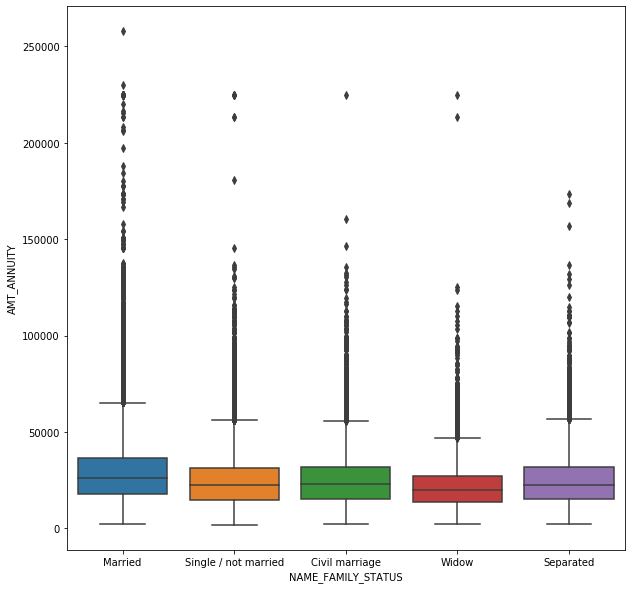

In [112]:
plt.figure(figsize=(10,10))

# plt.subplot(122)
# plt.title('Target 0')
sns.boxplot(data=Revised_App_Data_Target_0,x='NAME_FAMILY_STATUS' ,y='AMT_ANNUITY')

In [113]:
Revised_App_Data_Target_0.groupby('NAME_FAMILY_STATUS')['AMT_ANNUITY'].describe(percentiles  =[.25, .5, .75, .90, .99])

,count,mean,std,min,25%,50%,75%,90%,99%,max
NAME_FAMILY_STATUS,,,,,,,,,,
Civil marriage,26812.0,25170.197822,13480.687161,1993.5,15418.125,23069.25,31576.500,42484.5,67500.00,225000.0
Married,181575.0,28683.586394,15072.688362,1980.0,17617.500,26316.00,36666.000,47965.5,72607.50,258025.5
Separated,18150.0,24976.712479,13548.610319,2295.0,15034.500,22707.00,31630.500,42548.4,67203.00,173704.5
Single / not married,40984.0,24567.992326,13828.140245,1615.5,14481.000,22306.50,31096.125,42142.5,67500.00,225000.0
Widow,15151.0,22116.005148,11968.605419,1980.0,13783.500,20020.50,27069.750,37309.5,60185.25,225000.0


### Observation
- For people with no payment difficulties, 
    - Married people tend to have higher average annuity amounts. Median value is also highest for the married people
    - Widows on the contrary have minimum average annuity amounts and the range is also very small comparatively as visible 
    from box plot

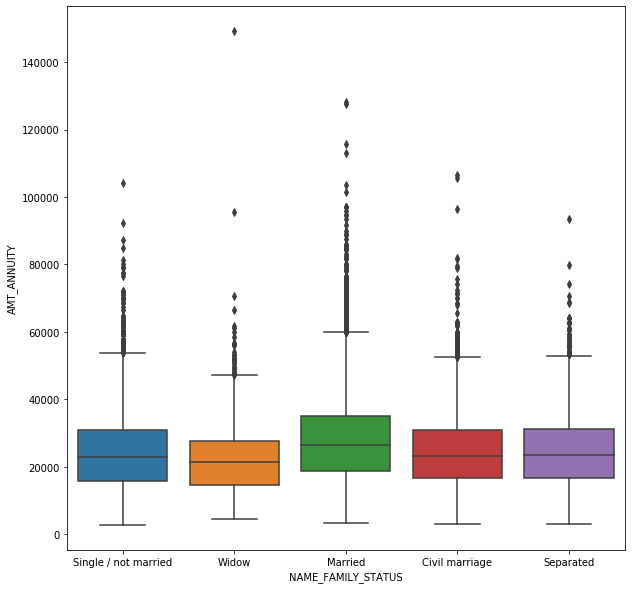

In [114]:
plt.figure(figsize=(10,10))
sns.boxplot(data=Revised_App_Data_Target_1,x='NAME_FAMILY_STATUS' ,y='AMT_ANNUITY')

In [115]:
Revised_App_Data_Target_1.groupby('NAME_FAMILY_STATUS')['AMT_ANNUITY'].describe(percentiles  =[.25, .5, .75, .90, .99] )

,count,mean,std,min,25%,50%,75%,90%,99%,max
NAME_FAMILY_STATUS,,,,,,,,,,
Civil marriage,2961.0,24797.022796,11803.052241,3172.5,16573.500,23274.0,30924.0,39987.00,59265.00,106380.0
Married,14850.0,27824.353939,12671.560601,3271.5,18643.500,26446.5,35158.5,44489.25,62955.09,128178.0
Separated,1620.0,24912.005556,11533.136514,3172.5,16572.375,23566.5,31180.5,39312.45,60305.76,93510.0
Single / not married,4457.0,24503.768118,11989.072212,2722.5,15790.500,23076.0,31023.0,39970.80,60948.90,104094.0
Widow,937.0,22649.859125,11572.481250,4513.5,14751.000,21420.0,27778.5,35937.00,56285.64,149211.0


### Observation
- In both the cases
    - Married people tend to have higher average annuity amounts. Median value is also highest for the married people
    Widows on the contrary have minimum average annuity amounts and the range is also very small comparatively as visible 
    from box plot

## AMT_INCOME_TOTAL, AMT_CREDIT

#### Target 1

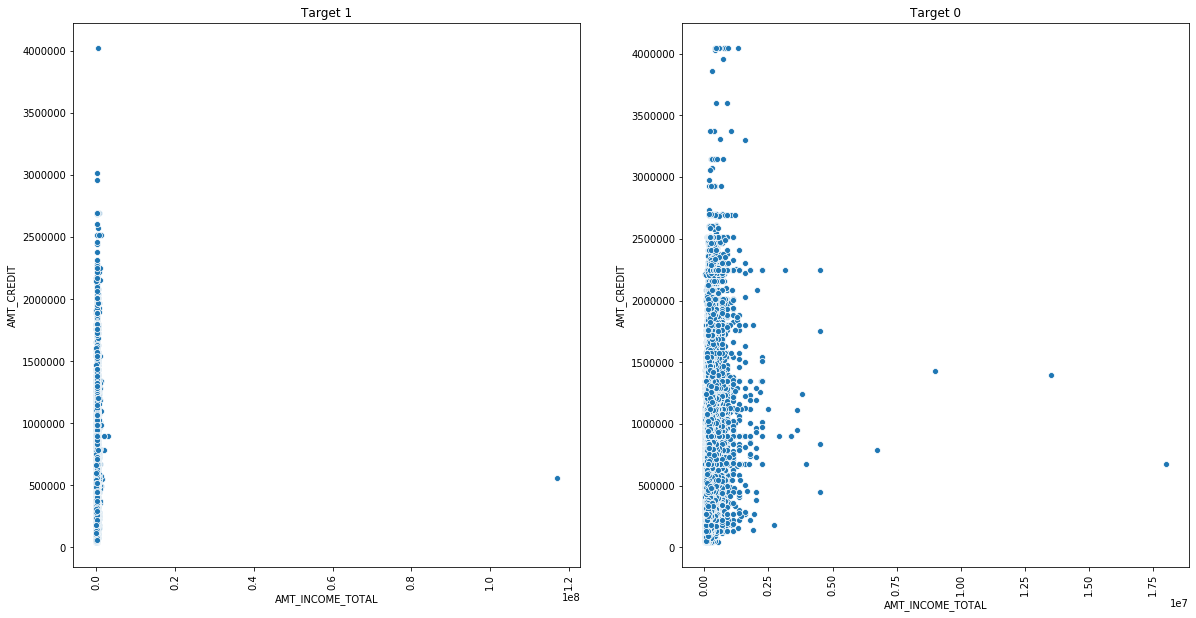

In [116]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xticks(rotation=90)
plt.title('Target 1')
sns.scatterplot(data=Revised_App_Data_Target_1, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

plt.subplot(122)
plt.xticks(rotation=90)
plt.title('Target 0')
sns.scatterplot(data=Revisehd_App_Data_Target_0, x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

### Observation
- For Target 1
    - Most of the credit is concentrated for people with lower income ranges(<2 lacs)
- For Target 0 
    - Considerable Credit flows are in higher ranges as well. 
- We may say that lower income people are more likely to face payment difficulties

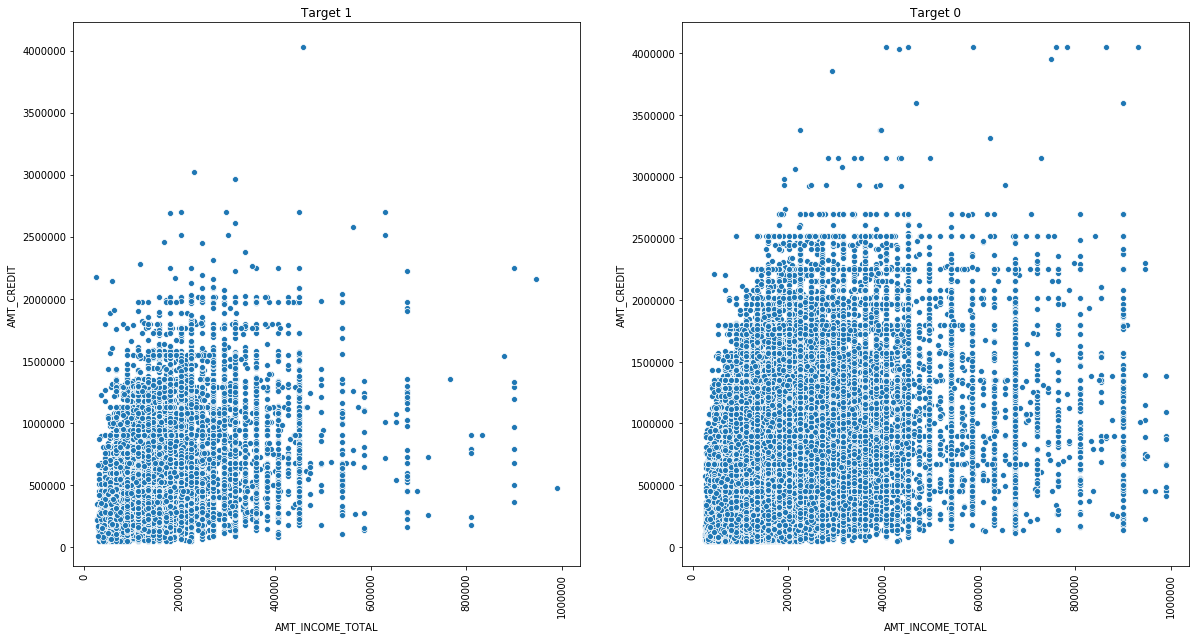

In [117]:
## lets zoom in 
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xticks(rotation=90)
plt.title('Target 1')
sns.scatterplot(data=Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000], x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

plt.subplot(122)
plt.xticks(rotation=90)
plt.title('Target 0')
sns.scatterplot(data=Revised_App_Data_Target_0[Revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000],x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

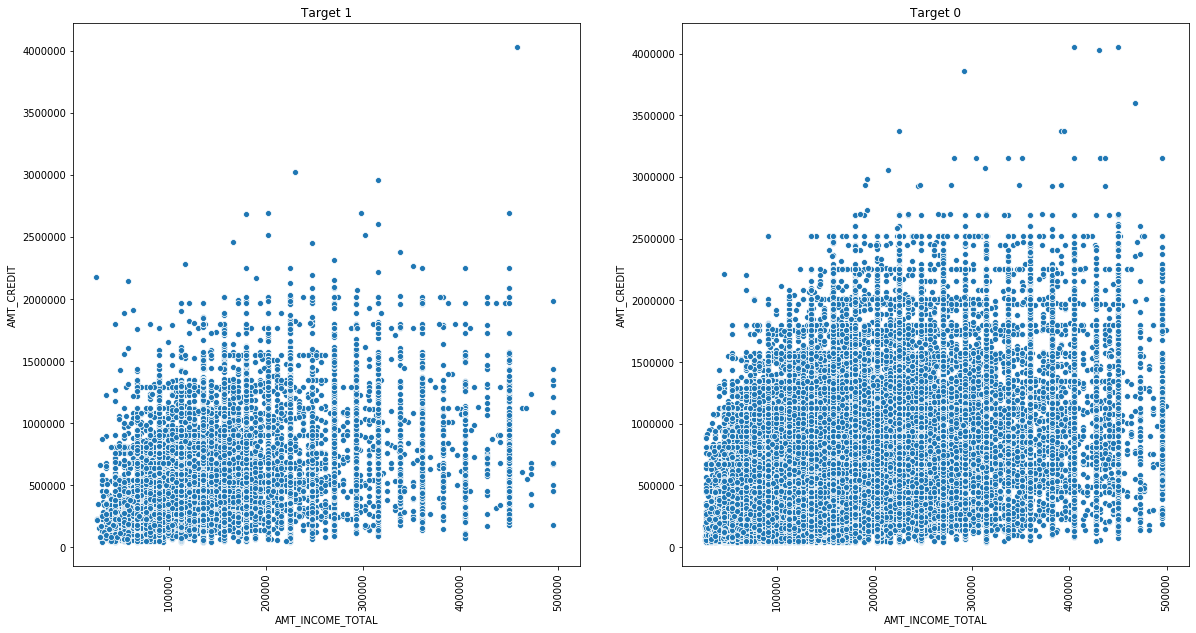

In [118]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.xticks(rotation=90)
plt.title('Target 1')
sns.scatterplot(data=Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<500000], x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

plt.subplot(122)
plt.xticks(rotation=90)
plt.title('Target 0')
sns.scatterplot(data=Revised_App_Data_Target_0[Revised_App_Data_Target_0['AMT_INCOME_TOTAL']<500000],x='AMT_INCOME_TOTAL', y='AMT_CREDIT')

### Observation from graphs above.
- Upper limits of the credits in case of people with payment difficulties is less. 
- Most of the paymet difficulties are associated with the people with incomes less than 5 lacs

## NAME_EDUCATION_TYPE , AMT_CREDIT

In [119]:
Revised_App_Data_Target_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.786465
Higher education                 0.161490
Incomplete higher                0.035126
Lower secondary                  0.016798
Academic degree                  0.000121
Name: NAME_EDUCATION_TYPE, dtype: float64

In [120]:
Revised_App_Data_Target_0['NAME_EDUCATION_TYPE'].value_counts(normalize=True)

Secondary / secondary special    0.703496
Higher education                 0.250644
Incomplete higher                0.033270
Lower secondary                  0.012020
Academic degree                  0.000570
Name: NAME_EDUCATION_TYPE, dtype: float64

In [121]:
Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000].groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].describe(percentiles=[.25,.5,.75,.9,.95,.99])

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
NAME_EDUCATION_TYPE,,,,,,,,,,,
Academic degree,3.0,322500.000000,46837.484988,270000.0,303750.0,337500.0,348750.0,355500.0,357750.0,359550.0,360000.0
Higher education,4004.0,194126.166459,101311.608848,27000.0,135000.0,180000.0,225000.0,315000.0,382500.0,540000.0,990000.0
Incomplete higher,871.0,175119.504592,90698.840164,36000.0,112500.0,157500.0,214875.0,270000.0,360000.0,540000.0,810000.0
Lower secondary,417.0,129005.395683,57230.719069,31500.0,90000.0,117000.0,157500.0,202500.0,225000.0,311400.0,450000.0
Secondary / secondary special,19517.0,153263.511580,74010.512483,25650.0,110250.0,135000.0,180000.0,234000.0,292500.0,405000.0,945000.0


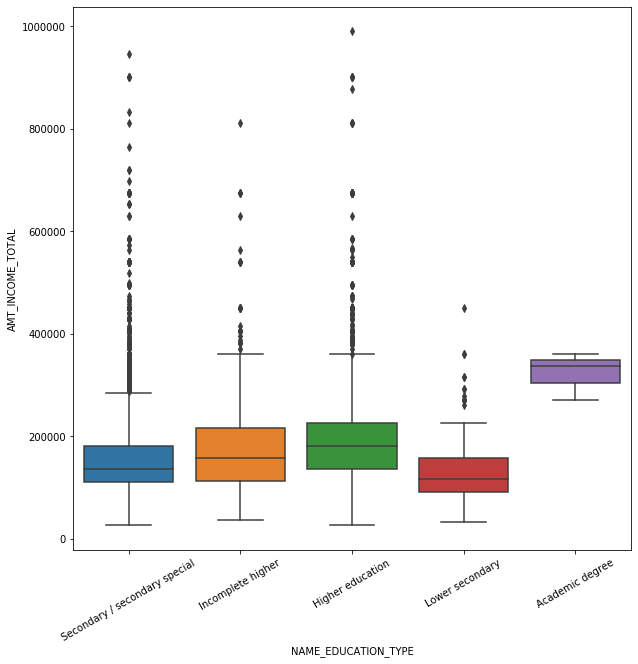

In [122]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
sns.boxplot(data=Revised_App_Data_Target_1[Revised_App_Data_Target_1['AMT_INCOME_TOTAL']<1000000],x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL')

### Observation
- There are only 3 cases of default for people with Academic degree and those are in middle income range. 
- People with Secondary / secondary special education level are more likely to default

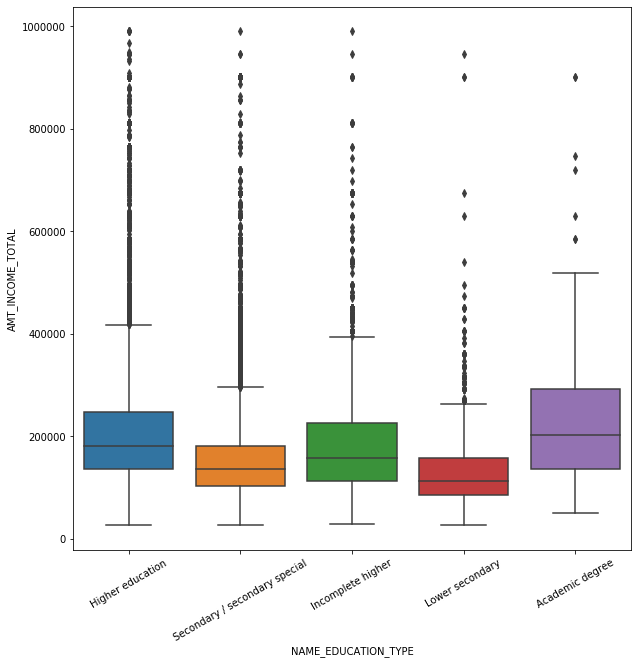

In [123]:
plt.figure(figsize=(10,10))
plt.xticks(rotation=30)
sns.boxplot(data=Revised_App_Data_Target_0[Revised_App_Data_Target_0['AMT_INCOME_TOTAL']<1000000],x='NAME_EDUCATION_TYPE' ,y='AMT_INCOME_TOTAL')